In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

import time
import datetime as datetime

In [2]:
weather = pd.read_csv('../data/clean_weather.csv')
stat1 = pd.read_csv('../data/clean_stat1.csv')
stat2 = pd.read_csv('../data/clean_stat2.csv')
train = pd.read_csv('../data/clean_train.csv')
test = pd.read_csv('../data/clean_test.csv')

In [3]:
train.date = pd.to_datetime(train.date, format = '%Y-%m-%d')
test.date = pd.to_datetime(test.date, format = '%Y-%m-%d')
stat1.date = pd.to_datetime(stat1.date, format = '%Y-%m-%d')
stat2.date = pd.to_datetime(stat2.date, format = '%Y-%m-%d')
weather.date = pd.to_datetime(weather.date, format = '%Y-%m-%d')

In [4]:
print('Year:')
print(weather['year'].unique())
print('Month:')
print(weather['month'].unique())
print('Day:')
print(weather['day'].unique())

Year:
[2007 2008 2009 2010 2011 2012 2013 2014]
Month:
[ 5  6  7  8  9 10]
Day:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


Weather data from years 2007-2014.  
There is only data for 6 months of the year from May to October, as expected as these are the months where the tests were conducted.

In [5]:
weather.date = pd.to_datetime(weather.date, format = '%Y-%m-%d')

Weather data from years 2007-2014.  
There is only data for 6 months of the year from May to October

In [6]:
#create dataframe to group temperatures by the year and month as index
year_month_temp = pd.DataFrame(weather.groupby(['month'])['tmax','tmin','tavg'].mean())

<ipython-input-6-b5899121dedd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_month_temp = pd.DataFrame(weather.groupby(['month'])['tmax','tmin','tavg'].mean())


In [7]:
year_month_temp.head()

,tmax,tmin,tavg
month,,,
5,71.497984,51.288306,61.363911
6,80.503132,61.544885,71.281837
7,84.514113,66.322581,75.438508
8,82.720081,65.381339,74.059838
9,75.020833,56.935417,66.000000


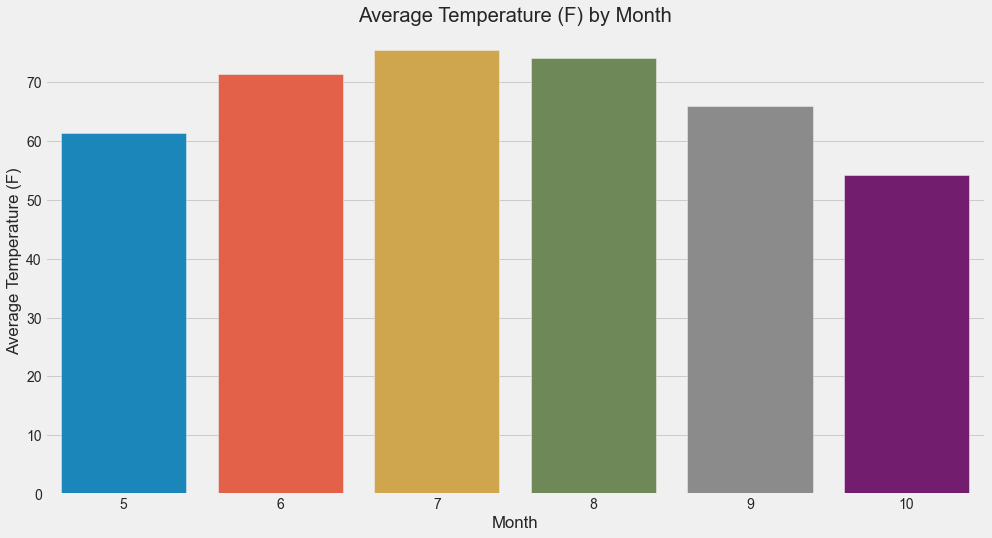

In [8]:
# Visually compare differences between temperature by month
plt.figure(figsize=(15,8))

sns.barplot(data = weather, x = 'month',y='tavg', ci=None)
plt.title('Average Temperature (F) by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.savefig('../images/Ave_Temp_Month.png',)
plt.show()

__Observation__: The data suggests that July is the hottest month.  As we know that the WNV propogates best in hot and dry conditions, this suggests that the virus may propogate the most easily in July.


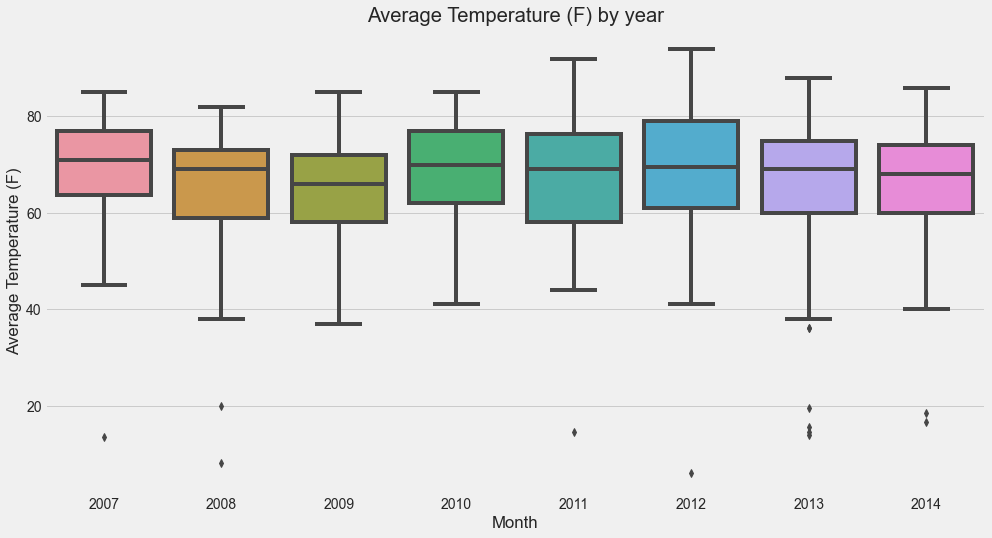

In [9]:
# Visually compare differences between temperature by year
plt.figure(figsize=(15,8))

sns.boxplot(data = weather, x = 'year',y='tavg')
plt.title('Average Temperature (F) by year')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.savefig('../images/Ave_Temp_Year.png',)
plt.show()

__Observation__: 
The data suggests that 2010 had the highest average temperatures, and that 2009 had the widest variance in temperatures.  As we know that WNV propogates in the heat, it will also be interesting to find out if incidences in 2011 or 2012 was more than normal as these years had the most variance in temperatures above the upper percentile.


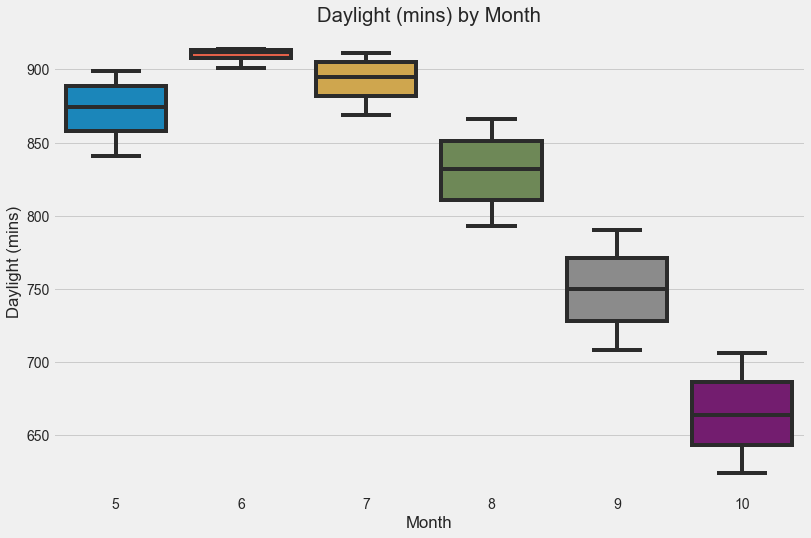

In [10]:
# Visually compare differences in daylight minutes by month
plt.figure(figsize=(12,8))

sns.boxplot(data = stat1, x = 'month',y='daylightmins')
plt.title('Daylight (mins) by Month')
plt.xlabel('Month')
plt.ylabel('Daylight (mins)')
plt.savefig('../images/Daylight_Mins_Month.png',)
plt.show()

__Observation__: Amount of minutes of daylight is highest in June and least in October.  It would be interesting to see the impact of number of daylight minutes on the propogation of WNV.

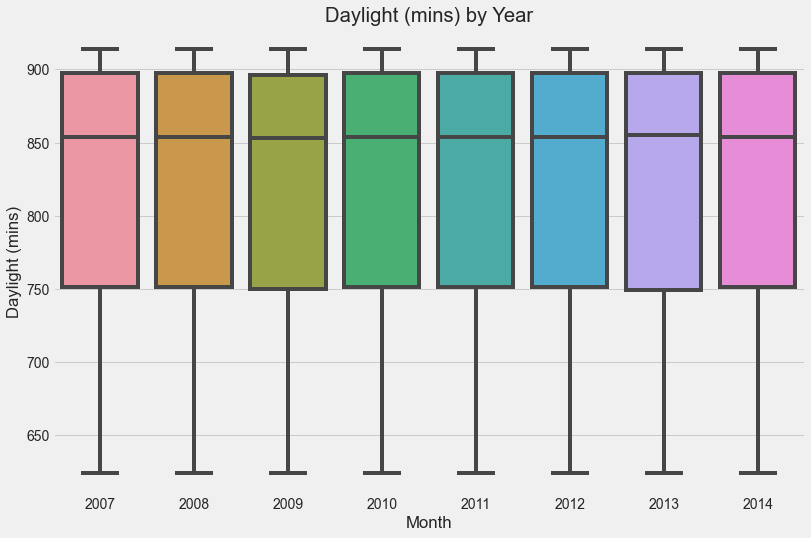

In [11]:
# Visually compare differences in daylight minutes by year
plt.figure(figsize=(12,8))

sns.boxplot(data = stat1, x = 'year',y='daylightmins')
plt.title('Daylight (mins) by Year')
plt.xlabel('Month')
plt.ylabel('Daylight (mins)')
plt.savefig('../images/Daylight_Mins_Year.png',)
plt.show()

__Observation__: There seems to be no change to the amount of daylight by year.

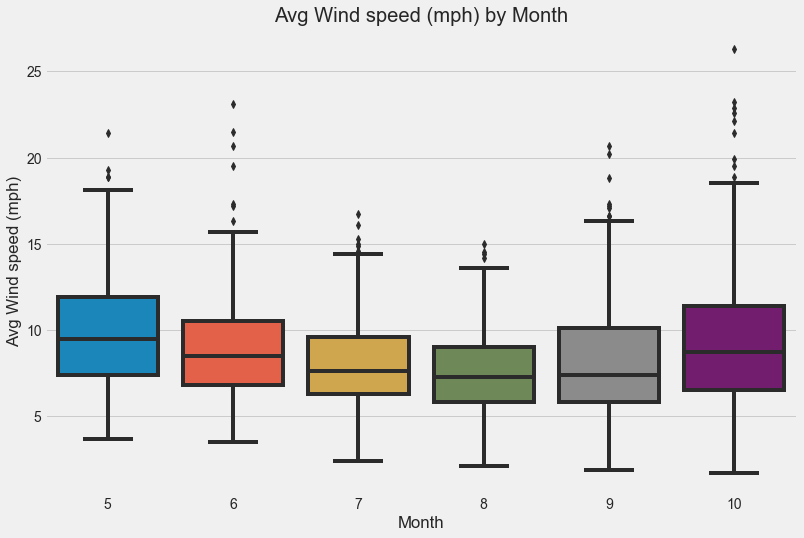

In [12]:
# Visually compare windspeed by month
plt.figure(figsize=(12,8))

sns.boxplot(data = weather, x = 'month',y='avgspeed')
plt.title('Avg Wind speed (mph) by Month')
plt.xlabel('Month')
plt.ylabel('Avg Wind speed (mph)')
plt.savefig('../images/Ave_Windspeed_Month.png',)
plt.show()

__Observation__:  July and August seems to have the least windspeed.  This might be relevant to spraying cycle as the chemicals might be the least dispersed during these months.

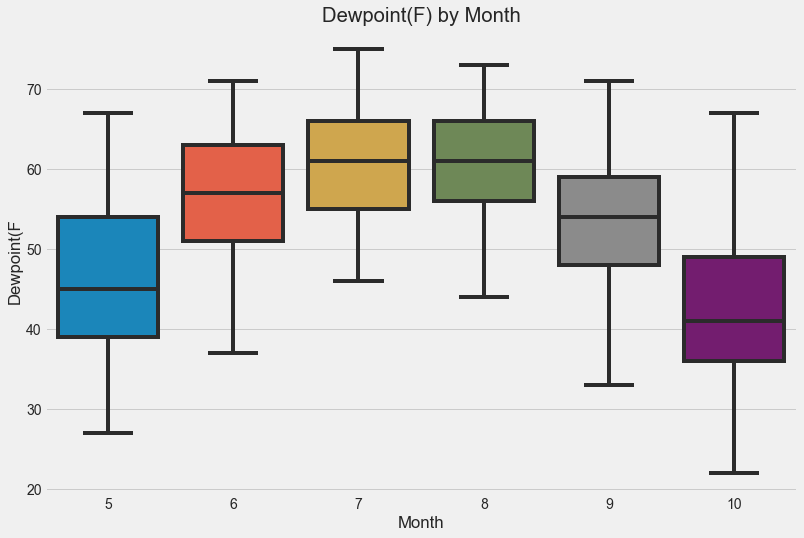

In [13]:
# Visual representation of humidity by month
plt.figure(figsize=(12,8))

sns.boxplot(data = weather, x = 'month',y='dewpoint')
plt.title('Dewpoint(F) by Month')
plt.xlabel('Month')
plt.ylabel('Dewpoint(F')
plt.savefig('../images/Dewpoints_Month.png',)
plt.show()

__Observation__:  July seems to have the highest dewpoint temperatures, which again suggest that propagation of WNV is ideal during this month. 

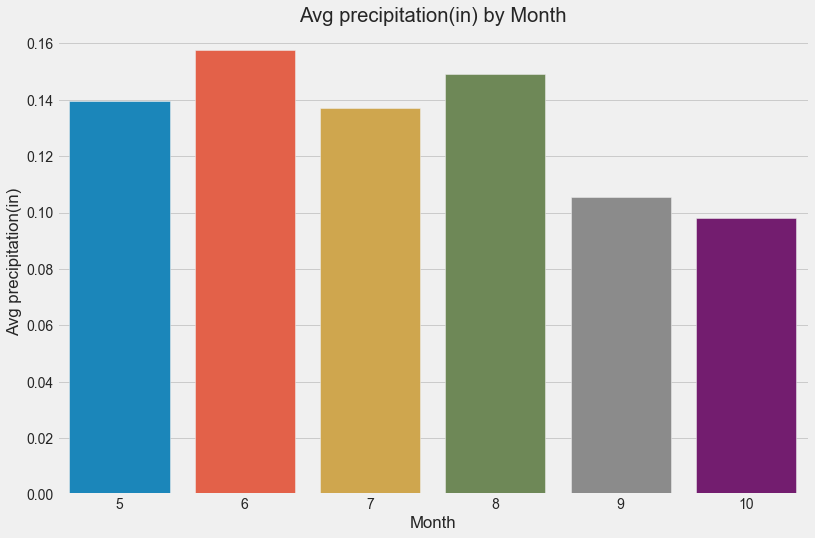

In [14]:
# Visual representation of preciptotal by month
plt.figure(figsize=(12,8))

sns.barplot(data = weather, x = 'month',y='preciptotal', ci=None)
plt.title('Avg precipitation(in) by Month')
plt.xlabel('Month')
plt.ylabel('Avg precipitation(in)')
plt.savefig('../images/Precipitation_Month.png',)
plt.show()

__Observation__: June has the highest aveage precipitation.  This might not be conducive for the spread of the WNV.

----


Additionally, from the data dictionary, we know that the data gathered from station 1 is in Chicago O'Hare Itnernational airport and station 2 is in Chicago Midway Int'l Airport.

We also know previously from cleaning that station 2 captures less data than station 1.  Hence, we will compare the data gathered by both stations to see if the data gathered is significantly different.

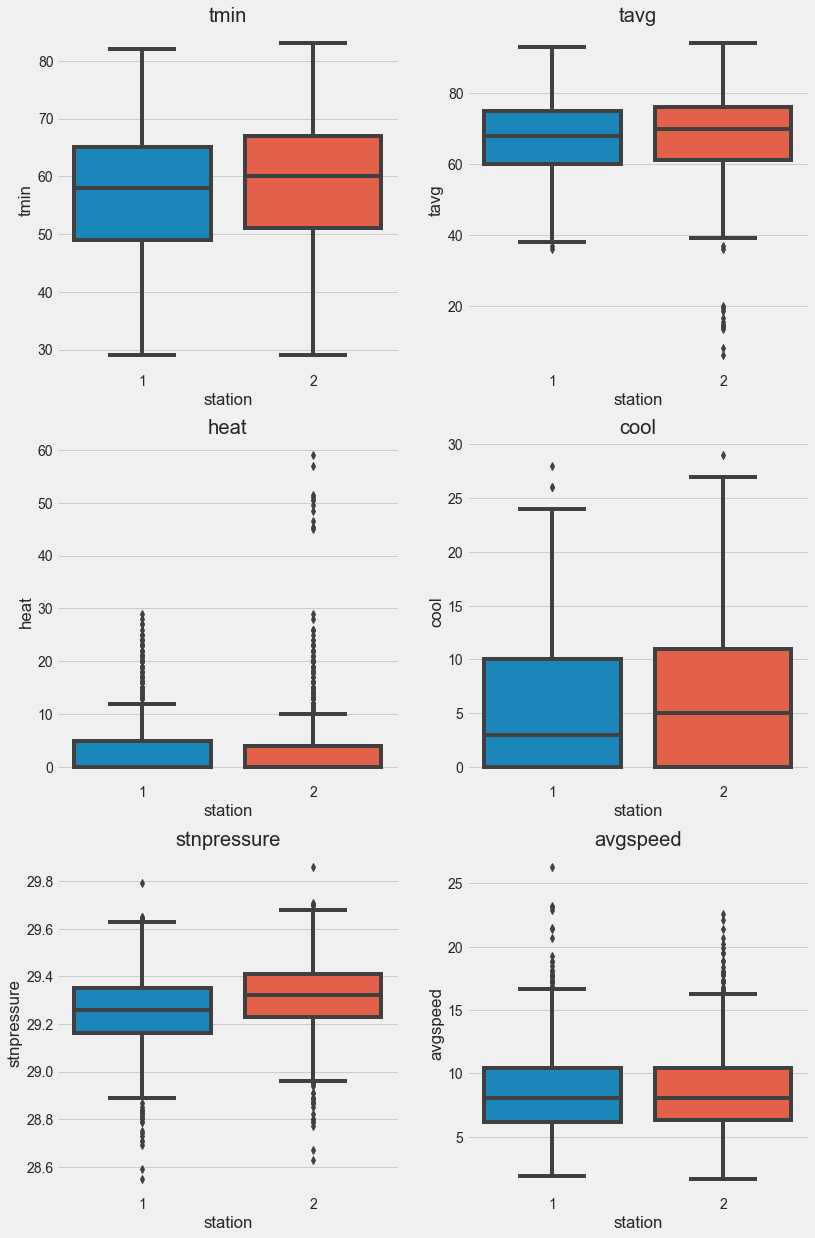

In [15]:
# Visually  compare differences

fig, ax = plt.subplots(3,2, figsize = (12,20))
ax = ax.ravel()
for n, col in enumerate(['tmin', 'tavg', 'heat', 'cool', 'stnpressure', 'avgspeed']):
    g = sns.boxplot(data = weather, x = 'station', y = col, ax = ax[n])
    g.set_title(col)
    
plt.savefig('../images/Station_Comparison.png',)
plt.show()

__Observation__: As the data between the 2 stations do not show much difference, and station 1 has additional features including length of day, sunset and sunrise timing, we will be using data from station 1 instead of averaging both station 1 and station 2 data.

In [16]:
# Drop unnecessary columns from stat1
stat1.drop(columns = ['station', 'sunset', 'sunrise','year','month','day'], inplace = True)

In [17]:
train.drop(columns = ['day','month','year'], inplace = True)

In [18]:
#get dummy variables for street in train/test dataset
train = pd.get_dummies(data = train, columns = ['street'])
test = pd.get_dummies(data = test, columns = ['street'])

In [19]:
# Merge weather data to train and test set
train_merged = train.merge(stat1, on = 'date', how = 'left')
test_merged = test.merge(stat1, on = 'date', how = 'left')

In [20]:
train_merged

,date,species,latitude,longitude,nummosquitos,wnvpresent,street_ W ARMITAGE AVENUE,street_ E 105TH ST,street_ E 111TH ST,street_ E 115TH ST,...,resultspeed_sma_3,resultspeed_sma_7,stnpressure_sma_3,stnpressure_sma_7,heat_sma_3,heat_sma_7,cool_sma_3,cool_sma_7,wetbulb_sma_3,wetbulb_sma_7
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,0,0,0,0,...,5.100000,5.385714,29.436667,29.405714,0.000000,1.857143,3.0,1.714286,59.333333,57.714286
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,1,0,0,0,0,0,...,5.100000,5.385714,29.436667,29.405714,0.000000,1.857143,3.0,1.714286,59.333333,57.714286
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,1,0,0,0,0,0,...,5.100000,5.385714,29.436667,29.405714,0.000000,1.857143,3.0,1.714286,59.333333,57.714286
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,1,0,0,0,0,0,...,5.100000,5.385714,29.436667,29.405714,0.000000,1.857143,3.0,1.714286,59.333333,57.714286
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,4,0,0,0,0,0,...,5.100000,5.385714,29.436667,29.405714,0.000000,1.857143,3.0,1.714286,59.333333,57.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,CULEX PIPIENS/RESTUANS,41.763733,-87.742302,6,1,0,0,0,0,...,4.833333,5.457143,29.286667,29.314286,2.333333,10.214286,0.0,0.000000,56.666667,54.714286
10502,2013-09-26,CULEX PIPIENS/RESTUANS,41.987280,-87.666066,5,0,0,0,0,0,...,4.833333,5.457143,29.286667,29.314286,2.333333,10.214286,0.0,0.000000,56.666667,54.714286
10503,2013-09-26,CULEX PIPIENS/RESTUANS,41.912563,-87.668055,1,0,0,0,0,0,...,4.833333,5.457143,29.286667,29.314286,2.333333,10.214286,0.0,0.000000,56.666667,54.714286
10504,2013-09-26,CULEX PIPIENS/RESTUANS,42.009876,-87.807277,5,0,0,0,0,0,...,4.833333,5.457143,29.286667,29.314286,2.333333,10.214286,0.0,0.000000,56.666667,54.714286


In [21]:
# OHE Species
bad_moz = ['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS']

In [22]:
good_moz = [x for x in train_merged.species.unique() if x not in bad_moz]

In [23]:
train_merged.species.replace(to_replace = good_moz, value = "OTHERS", inplace = True)
test_merged.species.replace(to_replace = good_moz, value = "OTHERS", inplace = True)

In [24]:
#copy of train_merged
train_copy = train_merged.copy()

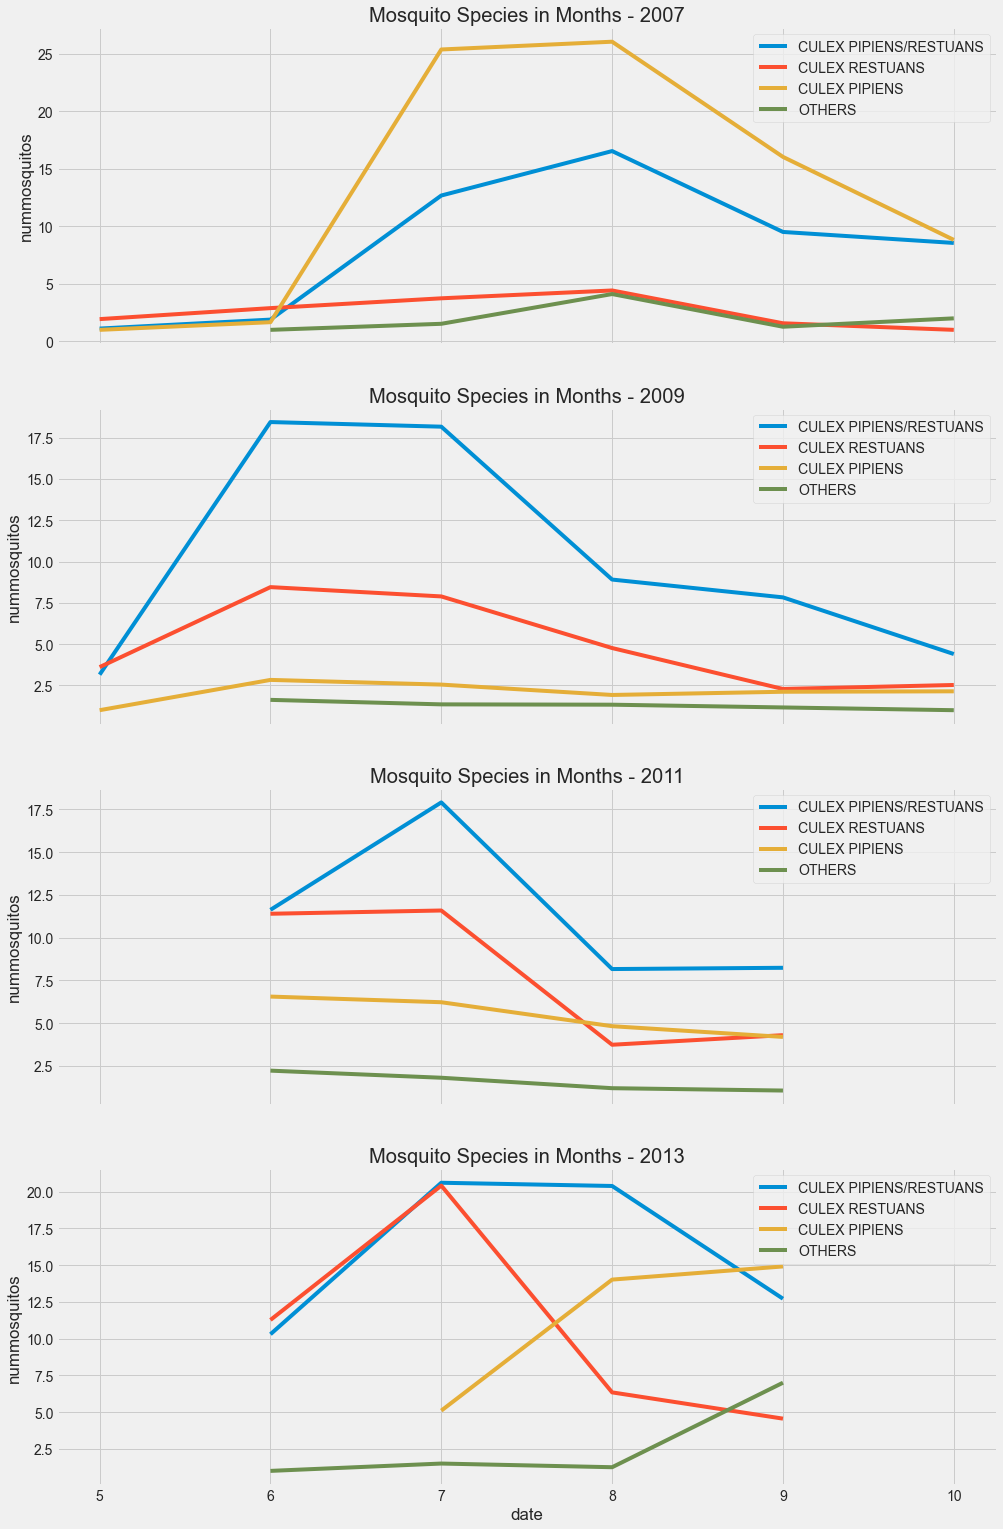

In [25]:
fig, ax = plt.subplots(4,1, figsize = (15,25), sharex=True)
ax = ax.ravel()

for n, col in enumerate([2007, 2009, 2011, 2013]):
    sns.lineplot(data=train_copy[train_copy.date.dt.year == col], x=train_copy.date.dt.month,
                    y='nummosquitos',hue='species', ci=None, ax=ax[n], 
                     hue_order=['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS', 'OTHERS'])
    ax[n].set_title(f'Mosquito Species in Months - {col}')
    ax[n].legend(loc='upper right')

plt.savefig('../images/Mos_Species_Months.png',)
plt.show()

**Observation:** 

In 2007, Culex Pipiens has the highest counts during July and August. This applies the same to the other species as well indicating a good breeding temperature during that period.

In 2009, the surge continues for Cules Pipiens/Culex Restuans, which has shifted to Jun and July. 

In 2011 and 2013, the peak continues to show breeding preference in July, in Mid Summer. 

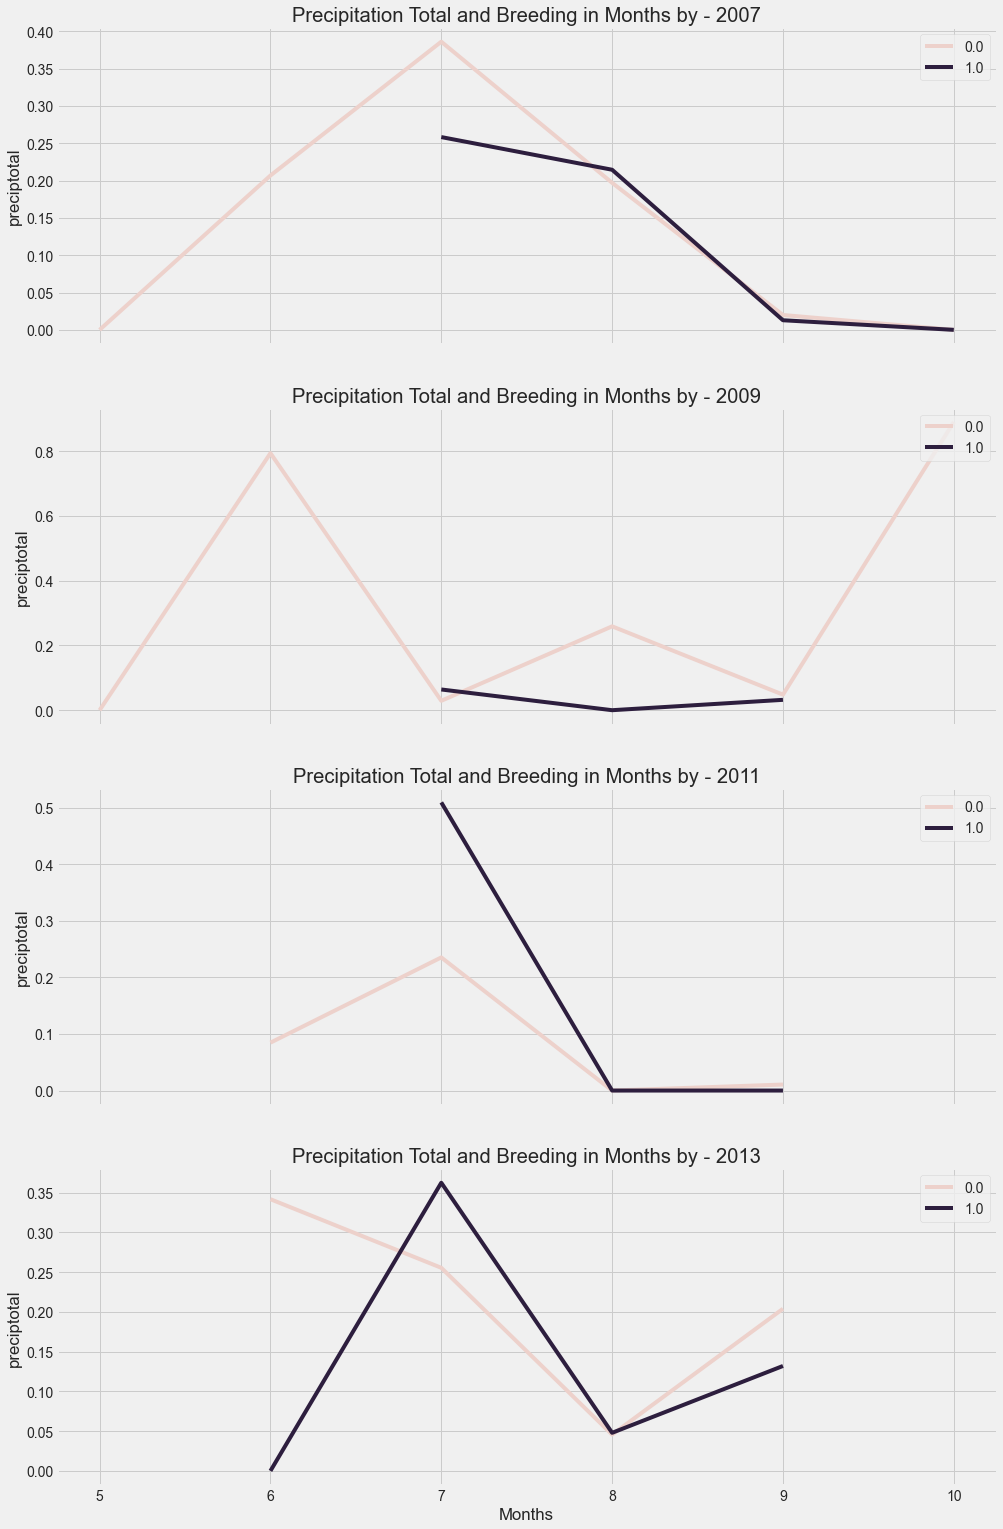

In [26]:
fig, ax = plt.subplots(4,1, figsize = (15,25), sharex=True)
ax = ax.ravel()

for n, col in enumerate([2007, 2009, 2011, 2013]):
    sns.lineplot(data=train_copy[train_copy.date.dt.year == col], x=train_copy.date.dt.month,
                    y='preciptotal',hue='wnvpresent', ci=None, ax=ax[n])
    ax[n].set_title(f'Precipitation Total and Breeding in Months by - {col}')
    ax[n].set_xlabel('Months')
    ax[n].legend(loc='upper right')
    
plt.savefig('../images/Precip_Total_Month_Year.png',)
plt.show()

**Observation:** The precipitation are indications of rainfall. In every occurance where WNV mosquitos are detected, often occurs during raining seasons. As the rain/precipitation reduces, the WNV mosquitos are found less as well.

In [27]:
# Dropping object cols
drop_cols = [x for x in train_merged.select_dtypes('O').columns.to_list() if x not in ['species']]

In [28]:
#drop object columns for test and train merged dataset
train_merged.drop(columns = drop_cols, inplace = True)
test_merged.drop(columns = drop_cols, inplace = True)

In [29]:
#get dummy variables for species in train/test merged dataset
train_merged = pd.get_dummies(data = train_merged, columns = ['species'])
test_merged = pd.get_dummies(data = test_merged, columns = ['species'])

In [30]:
train_merged.shape

(10506, 184)

In [31]:
# Dropping rows with missing weather data
train_merged.dropna(inplace = True)
test_merged.dropna(inplace = True)

In [32]:
train_merged.shape

(10413, 184)

In [33]:
# Extracting columns in test not in train dataset
miscol_test = [x for x in test_merged.columns.to_list() if x not in train_merged.columns.to_list()]

In [34]:
miscol_test[0]

'id'

In [35]:
test_merged['species_UNSPECIFIED CULEX'].value_counts()

0    101948
1     14345
Name: species_UNSPECIFIED CULEX, dtype: int64

In [36]:
train_merged.head()

,date,latitude,longitude,nummosquitos,wnvpresent,street_ W ARMITAGE AVENUE,street_ E 105TH ST,street_ E 111TH ST,street_ E 115TH ST,street_ E 118TH ST,...,heat_sma_3,heat_sma_7,cool_sma_3,cool_sma_7,wetbulb_sma_3,wetbulb_sma_7,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_OTHERS
0,2007-05-29,41.954690,-87.800991,1,0,0,0,0,0,0,...,0.0,1.857143,3.0,1.714286,59.333333,57.714286,0,1,0,0
1,2007-05-29,41.954690,-87.800991,1,0,0,0,0,0,0,...,0.0,1.857143,3.0,1.714286,59.333333,57.714286,0,0,1,0
2,2007-05-29,41.994991,-87.769279,1,0,0,0,0,0,0,...,0.0,1.857143,3.0,1.714286,59.333333,57.714286,0,0,1,0
3,2007-05-29,41.974089,-87.824812,1,0,0,0,0,0,0,...,0.0,1.857143,3.0,1.714286,59.333333,57.714286,0,1,0,0
4,2007-05-29,41.974089,-87.824812,4,0,0,0,0,0,0,...,0.0,1.857143,3.0,1.714286,59.333333,57.714286,0,0,1,0


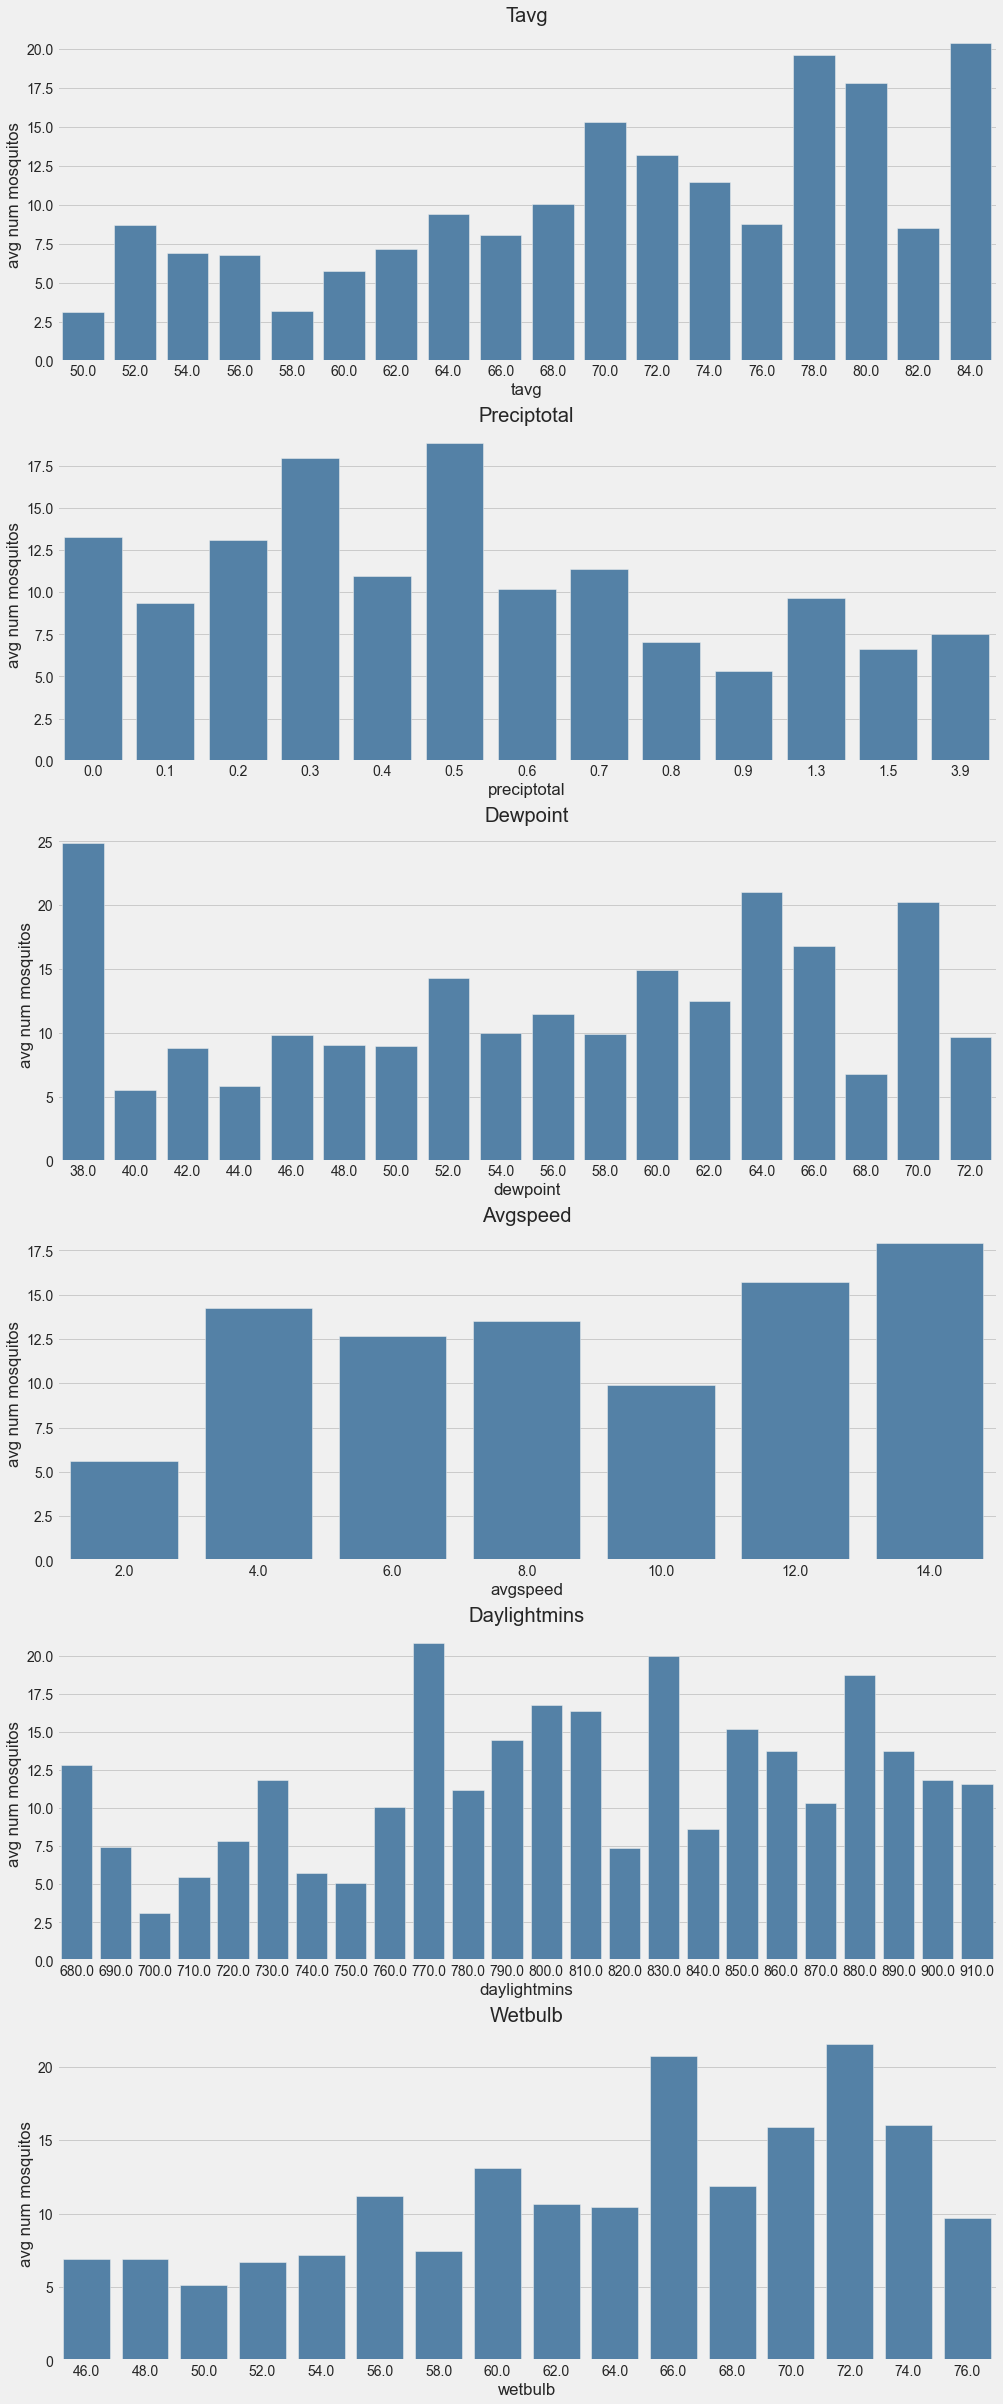

In [37]:

fig, ax = plt.subplots(6,1, figsize = (15,40))
ax = ax.ravel()

for n, col in enumerate(['tavg', 'preciptotal', 'dewpoint', 'avgspeed', 'daylightmins', 'wetbulb']):
    agg_num = {'tavg': 2,  #every 2 deg
               'preciptotal':0.10, #every 0.1 precipitotal
               'dewpoint':2, #every 2 deg
               'avgspeed':2, #every 2deg
               'daylightmins':10, #every 10mins
               'wetbulb':2} #every 2 deg 
    
    #df for each col with nummosquitos
    plot_df = train_merged[[col, 'nummosquitos']].copy()
    #agg float to round up or below 
    plot_df[col] = plot_df[col] // agg_num[col] * agg_num[col]

    # plot col vs nummosquito
    g = sns.barplot(data = plot_df, x = col, y = 'nummosquitos', ax = ax[n], color = 'steelblue', ci=False)
    
    labels = [item.get_text() for item in g.get_xticklabels()]
    g.set_xticklabels([str(round(float(label), 2)) for label in labels])
    g.set_ylabel('avg num mosquitos')
    g.set_title(col.title())

plt.savefig('../images/Weather_on_Avg_Mos_count.png',)
plt.show()

__Observation__:  The average number of mosquitos seems to be positively correlated to average temperature and inverseley correlated to amount of precipitation.  It also seems to follow a standard distribution based on the amount of daylight.  No visible relationship could be discerned with the other features.

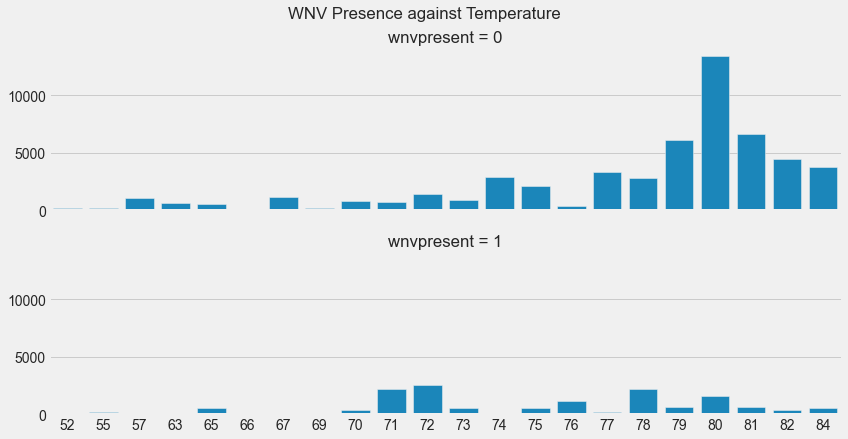

In [38]:
temp_df = train_merged.groupby(['wnvpresent', 'tavg']).sum()['nummosquitos'].reset_index()
temp_df['tavg'] = temp_df['tavg'].astype(int)
g = sns.FacetGrid(temp_df, row='wnvpresent', row_order=[0, 1], height=3, aspect=4)
g.map_dataframe(sns.barplot, x='tavg', y='nummosquitos', ci=None)
plt.suptitle("WNV Presence against Temperature",y=1.02)
plt.savefig('../images/WNV_Presence_by_Temp.png',)
plt.show()

**Observation:** Higher temperature may lead to higher quantities of mosquito breed, but does not imply higher rate of WNV presence.

In [39]:
train_merged.columns

Index(['date', 'latitude', 'longitude', 'nummosquitos', 'wnvpresent',
       'street_  W ARMITAGE AVENUE', 'street_ E 105TH ST',
       'street_ E 111TH ST', 'street_ E 115TH ST', 'street_ E 118TH ST',
       ...
       'heat_sma_3', 'heat_sma_7', 'cool_sma_3', 'cool_sma_7', 'wetbulb_sma_3',
       'wetbulb_sma_7', 'species_CULEX PIPIENS',
       'species_CULEX PIPIENS/RESTUANS', 'species_CULEX RESTUANS',
       'species_OTHERS'],
      dtype='object', length=184)

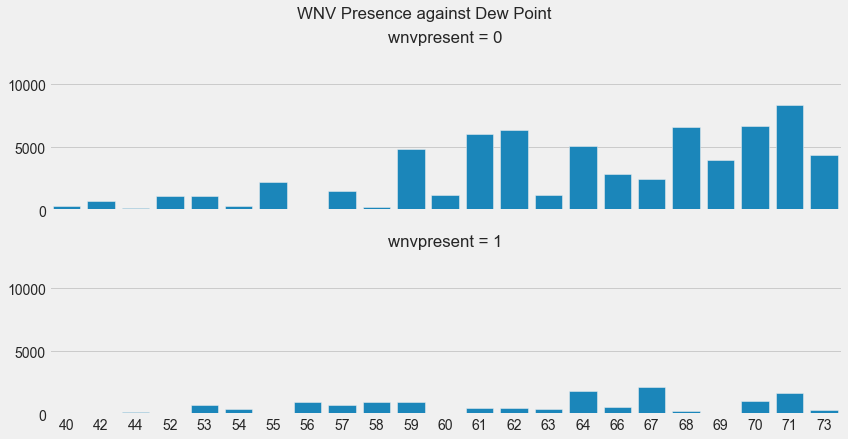

In [40]:
temp_df = train_merged.groupby(['wnvpresent', 'dewpoint']).sum()['nummosquitos'].reset_index()
temp_df['dewpoint'] = temp_df['dewpoint'].astype(int)
g = sns.FacetGrid(temp_df, row='wnvpresent', row_order=[0, 1], height=3, aspect=4)
g.map_dataframe(sns.barplot, x='dewpoint', y='nummosquitos', ci=None)
plt.suptitle("WNV Presence against Dew Point",y=1.02)
plt.savefig('../images/WNV_Presence_by_DewPoint.png',)
plt.show()

**Observation:** It is more likely when the dewpoint is higher, there is a higher number of mosquitos in the Chicago. However, this is to note that the tendency for WNV presence is not directly affected by the number of mosquito counts.

In our observation, the weather plays an essential role in affecting the breeding of the mosquitos numbers, however the WNV mosquitos are found specifically on 2 categories, Culex Pipiens and Culex Restuans. Other mosquitos does not carry such virus. Hence, in the response to identifiying the effectiveness of the current action, the spray data will then be investigated further on its effect by location.

In [41]:
# Export to CSV
train_merged.to_csv('../data/train_merged.csv', index = False)
test_merged.to_csv('../data/test_merged.csv', index = False)

In [43]:
train_merged.shape

(10413, 184)